In [7]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt


# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


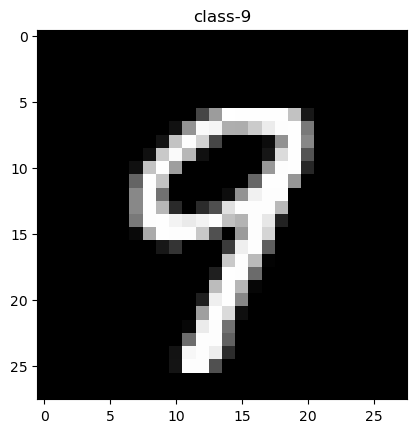

Train image 27815-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  70 156 255 254 254 254
  254 194  24   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  17 147 250 245 174 173 203 236
  253 254 122   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [8]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = "/home/sysadm/Downloads/ayan_assingment1/"# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [9]:
train_imageData= train_images.flatten().reshape(60000,28*28).astype(np.float64)
num_validation = int(0.2 * len(train_imageData))
validation_images = train_imageData[:num_validation]
validation_labels = train_labels[:num_validation]
train_images = train_imageData[num_validation:]
train_labels = train_labels[num_validation:]
print('Train data (X) size: {}, and labels (Y) size: {}'.format(train_images.shape, train_labels.shape))
print('Validation data (X) size: {}, and labels (Y) size: {}'.format(validation_images.shape, validation_labels.shape))
print('Test data (X) size: {}, and labels (Y) size: {}'.format(test_images.shape, test_labels.shape))


Train data (X) size: (48000, 784), and labels (Y) size: (48000,)
Validation data (X) size: (12000, 784), and labels (Y) size: (12000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [10]:
import numpy as np

def knn_predict(X_train, y_train, X_test, k, p):
    distances = []
    for i in range(len(X_test)):
        dist = np.linalg.norm(X_train - X_test[i], ord=p, axis=1)
        distances.append(dist)
    distances = np.array(distances)
    indices = np.argsort(distances, axis=1)[:, :k]
    knn_labels = y_train[indices]
    y_pred = np.zeros(X_test.shape[0], dtype=int)
    for i in range(len(knn_labels)):
        y_pred[i] = np.argmax(np.bincount(knn_labels[i]))
    return y_pred

k_values = list(range(1, 26, 2))
p_values = [1, 2, np.inf]

for p in p_values:
    for k in k_values:
        predictions = knn_predict(train_images.reshape(len(train_images), -1), 
                                  train_labels, 
                                  test_images.reshape(len(test_images), -1), 
                                  k, p)
        
        
        accuracy = np.mean(predictions == test_labels)
        
        
        print("p =", p, ", k =", k, ": Accuracy =", accuracy)


p = 1 , k = 1 : Accuracy = 0.9615
p = 1 , k = 3 : Accuracy = 0.9611
p = 1 , k = 5 : Accuracy = 0.9588
p = 1 , k = 7 : Accuracy = 0.9592
p = 1 , k = 9 : Accuracy = 0.9586
p = 1 , k = 11 : Accuracy = 0.9566
p = 1 , k = 13 : Accuracy = 0.9573
p = 1 , k = 15 : Accuracy = 0.9556
p = 1 , k = 17 : Accuracy = 0.9548
p = 1 , k = 19 : Accuracy = 0.9535
p = 1 , k = 21 : Accuracy = 0.9523
p = 1 , k = 23 : Accuracy = 0.9523
p = 1 , k = 25 : Accuracy = 0.9509
p = 2 , k = 1 : Accuracy = 0.9673
p = 2 , k = 3 : Accuracy = 0.9687
p = 2 , k = 5 : Accuracy = 0.9657
p = 2 , k = 7 : Accuracy = 0.9664
p = 2 , k = 9 : Accuracy = 0.9652
p = 2 , k = 11 : Accuracy = 0.9641
p = 2 , k = 13 : Accuracy = 0.964
p = 2 , k = 15 : Accuracy = 0.9631
p = 2 , k = 17 : Accuracy = 0.9618
p = 2 , k = 19 : Accuracy = 0.9601
p = 2 , k = 21 : Accuracy = 0.9599
p = 2 , k = 23 : Accuracy = 0.9593
p = 2 , k = 25 : Accuracy = 0.9588
p = inf , k = 1 : Accuracy = 0.81
p = inf , k = 3 : Accuracy = 0.7925
p = inf , k = 5 : Accuracy = 0.

In [11]:
accuracy_on_validation=[]
for p in p_values:
    for k in k_values:
        predictions_on_validation = knn_predict(train_images.reshape(len(train_images), -1), 
                                  train_labels, 
                                  validation_images.reshape(len(validation_images), -1), 
                                  k, p)
        validation_accuracy = np.mean(predictions_on_validation == validation_labels)
        print("p =", p, ", k =", k, ": Accuracy =", validation_accuracy)
        accuracy_on_validation.append(validation_accuracy)
print(accuracy_on_validation)


p = 1 , k = 1 : Accuracy = 0.963
p = 1 , k = 3 : Accuracy = 0.96475
p = 1 , k = 5 : Accuracy = 0.9635
p = 1 , k = 7 : Accuracy = 0.9625
p = 1 , k = 9 : Accuracy = 0.9596666666666667
p = 1 , k = 11 : Accuracy = 0.957
p = 1 , k = 13 : Accuracy = 0.9565
p = 1 , k = 15 : Accuracy = 0.95525
p = 1 , k = 17 : Accuracy = 0.9545
p = 1 , k = 19 : Accuracy = 0.95175
p = 1 , k = 21 : Accuracy = 0.9511666666666667
p = 1 , k = 23 : Accuracy = 0.9503333333333334
p = 1 , k = 25 : Accuracy = 0.9485
p = 2 , k = 1 : Accuracy = 0.97
p = 2 , k = 3 : Accuracy = 0.97175
p = 2 , k = 5 : Accuracy = 0.96975
p = 2 , k = 7 : Accuracy = 0.9680833333333333
p = 2 , k = 9 : Accuracy = 0.9655833333333333
p = 2 , k = 11 : Accuracy = 0.9646666666666667
p = 2 , k = 13 : Accuracy = 0.9635833333333333
p = 2 , k = 15 : Accuracy = 0.962
p = 2 , k = 17 : Accuracy = 0.9608333333333333
p = 2 , k = 19 : Accuracy = 0.9596666666666667
p = 2 , k = 21 : Accuracy = 0.9591666666666666
p = 2 , k = 23 : Accuracy = 0.9584166666666667
p =

In [17]:
for_p1=accuracy_on_validation[0:13]
for_p2=accuracy_on_validation[13:26]
for_p3=accuracy_on_validation[26:]

In [22]:
total_validation_accuracy=[for_p1,for_p2,for_p3]
print(total_validation_accuracy)

[[0.963, 0.96475, 0.9635, 0.9625, 0.9596666666666667, 0.957, 0.9565, 0.95525, 0.9545, 0.95175, 0.9511666666666667, 0.9503333333333334, 0.9485], [0.97, 0.97175, 0.96975, 0.9680833333333333, 0.9655833333333333, 0.9646666666666667, 0.9635833333333333, 0.962, 0.9608333333333333, 0.9596666666666667, 0.9591666666666666, 0.9584166666666667, 0.9565833333333333], [0.81375, 0.7978333333333333, 0.8035833333333333, 0.7975, 0.7913333333333333, 0.79125, 0.7889166666666667, 0.7894166666666667, 0.7879166666666667, 0.7819166666666667, 0.7793333333333333, 0.7770833333333333, 0.7760833333333333]]


In [26]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

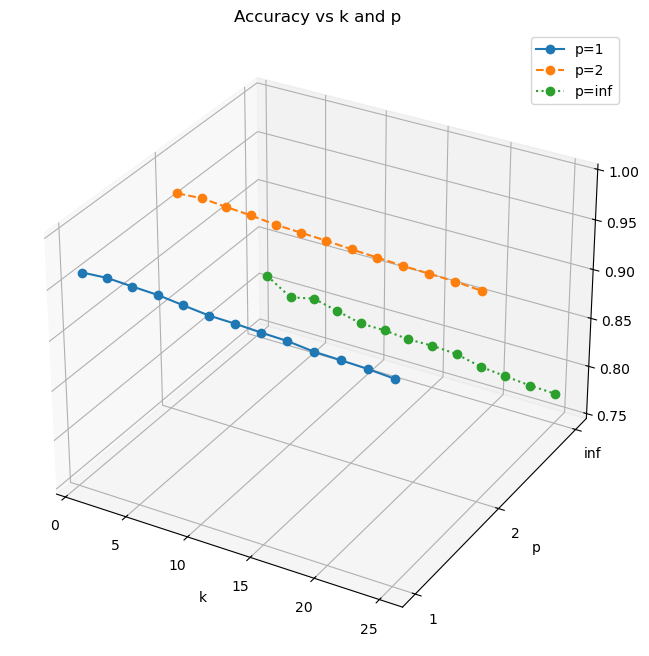

In [27]:
k_values = list(range(1, 26, 2))
p_values = [1, 2, np.inf]
accuracy_values=total_validation_accuracy
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
line_styles=['-','--',':']
for i,p in enumerate(p_values):
    ax.plot(k_values,[i]*len(k_values),accuracy_values[i],marker='o',linestyle=line_styles[i],label=f'p={p}')
ax.set_yticks([0,1,2])
ax.set_yticklabels(['1','2','inf'])
ax.set_ylabel('p')
ax.set_xlabel('k')
ax.set_zlabel=('Accuracy')
ax.set_title('Accuracy vs k and p')
ax.set_zlim(0.75,1.0)
plt.legend()
plt.show()